In [8]:
import pandas as pd
import numpy as np
import datetime 
from pandas.plotting._matplotlib import converter
converter.register()
from datetime import date
from datetime import timedelta  
import matplotlib.pyplot as plt

In [9]:
#importing excel file and removing rows with null values
df = pd.read_excel(r'./Documents/PO_Tracker_060920.xlsx', sheet_name='PO Tracker')
df = df.dropna(axis=0, subset=['Date Ordered'])
df = df.dropna(axis=0, subset=['Estimated Delivery Date'])

In [10]:
#calculating delivery times 
df['Delivery Time'] = (df['Estimated Delivery Date'] - df['Date Ordered']).dt.days

In [11]:
#calculating total ordered for each category
total_ordered = df.groupby(['Product Category'])['QTY Ordered in EA'].sum()

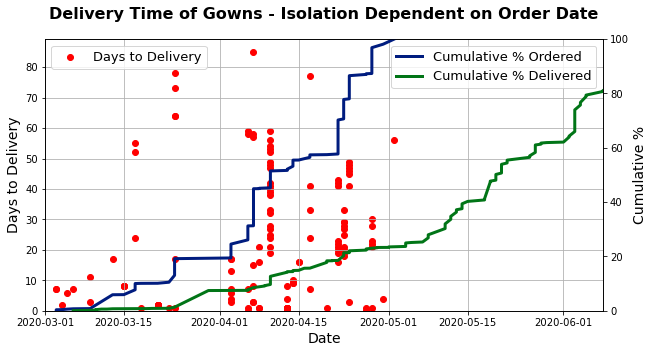

Total ordered of EA for Gowns - Isolation = 3,921,166.0


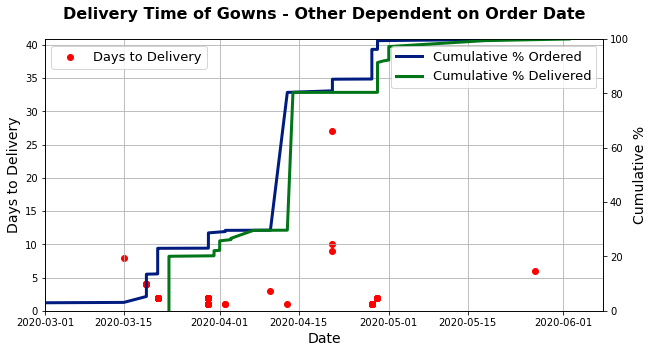

Total ordered of EA for Gowns - Other = 49,416.0


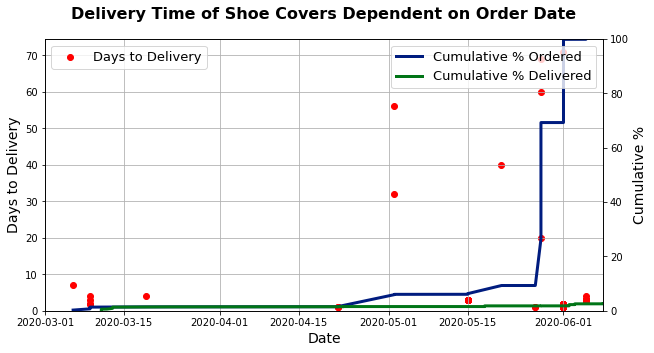

Total ordered of EA for Shoe Covers = 3,336,296.0


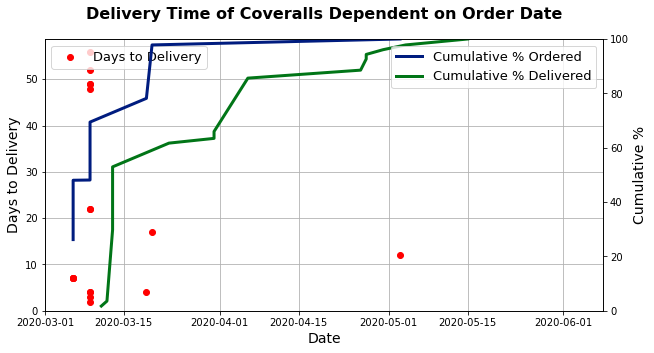

Total ordered of EA for Coveralls = 28,625.0


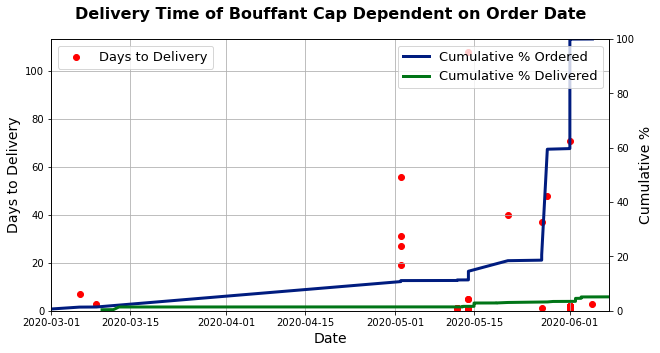

Total ordered of EA for Bouffant Cap = 2,572,540.0


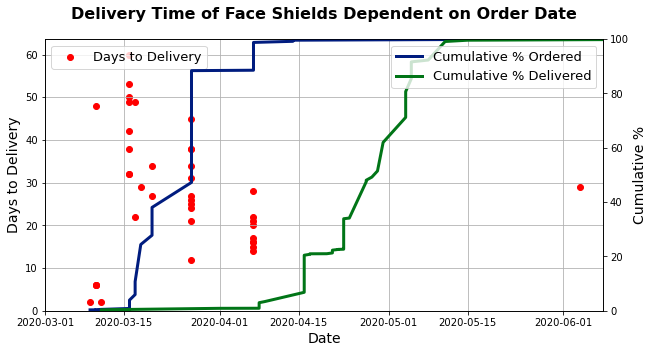

Total ordered of EA for Face Shields = 1,466,045.0


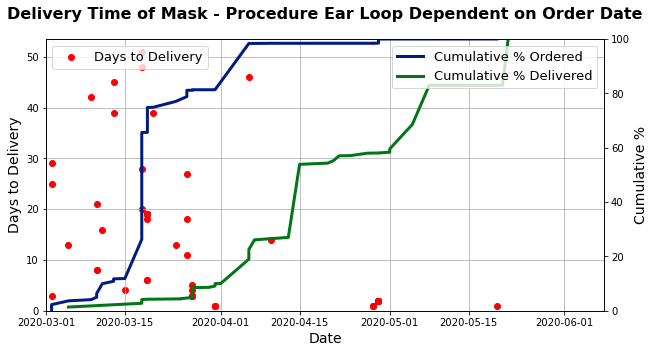

Total ordered of EA for Mask - Procedure Ear Loop = 5,580,091.0


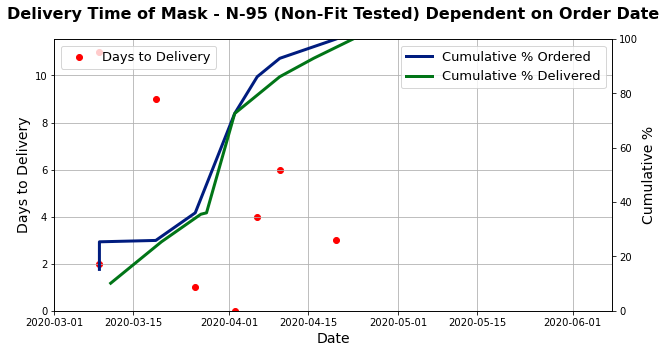

Total ordered of EA for Mask - N-95 (Non-Fit Tested) = 118,200.0


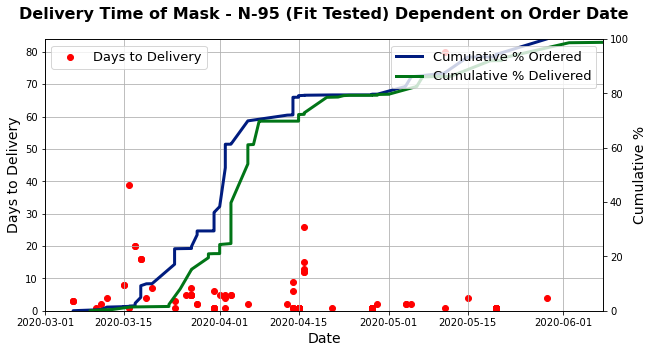

Total ordered of EA for Mask - N-95 (Fit Tested) = 559,841.0


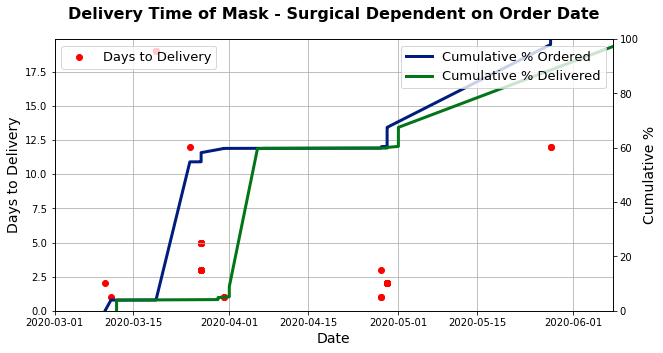

Total ordered of EA for Mask - Surgical = 492,121.0


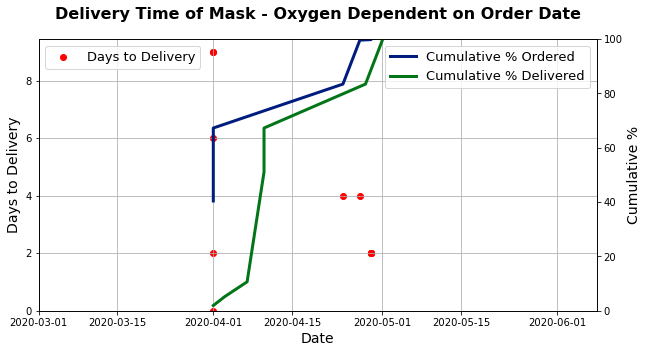

Total ordered of EA for Mask - Oxygen = 30,931.0


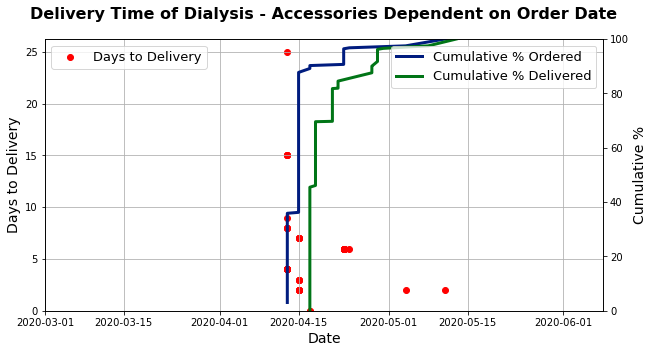

Total ordered of EA for Dialysis - Accessories = 13,898.0


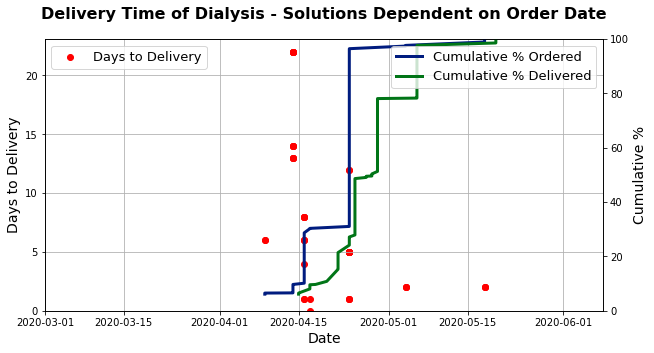

Total ordered of EA for Dialysis - Solutions = 5,612.0


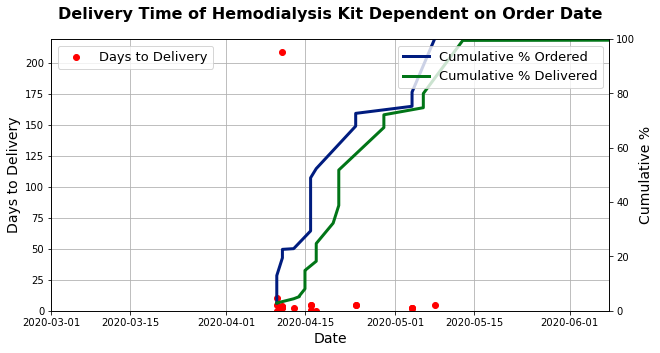

Total ordered of EA for Hemodialysis Kit = 1,535.0


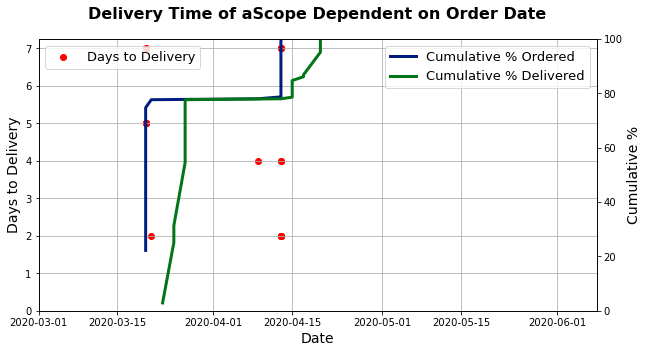

Total ordered of EA for aScope = 8,640.0


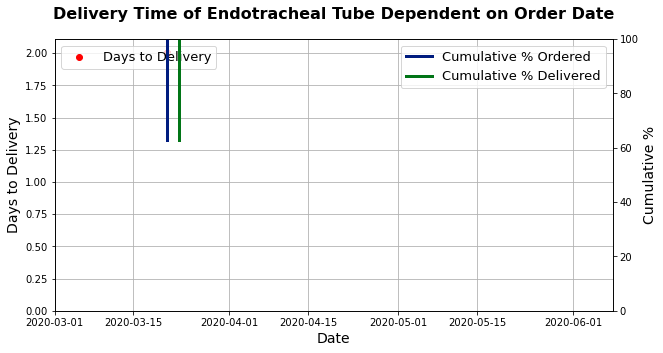

Total ordered of EA for Endotracheal Tube = 1,431.0


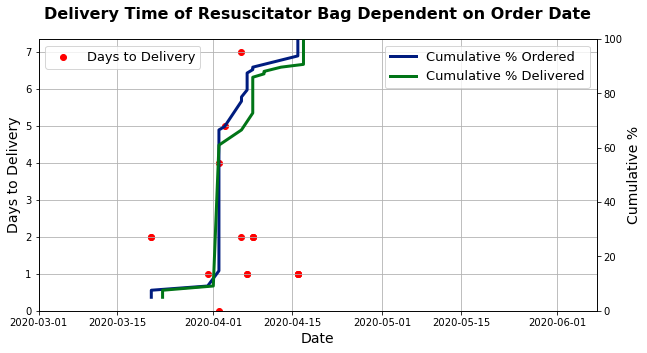

Total ordered of EA for Resuscitator Bag = 3,859.0


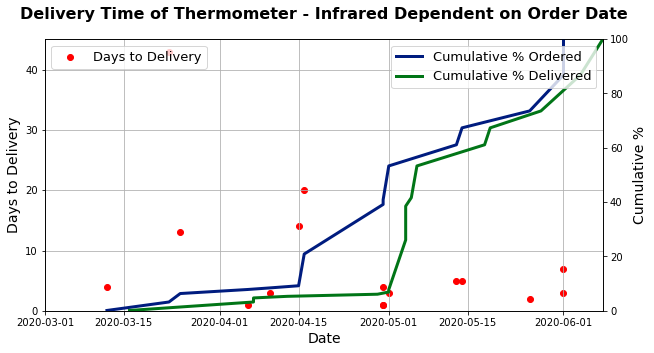

Total ordered of EA for Thermometer - Infrared = 3,212.0


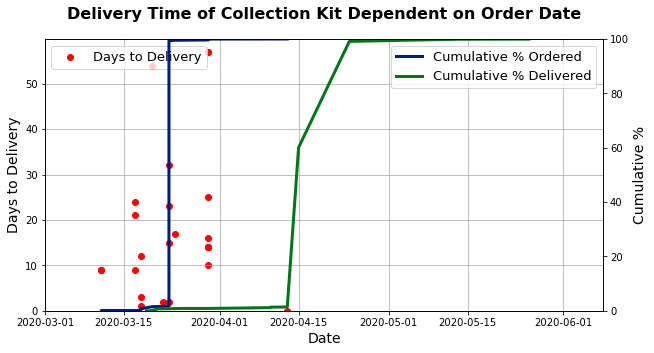

Total ordered of EA for Collection Kit = 5,130,870.0


In [14]:
#plotting graphs
ppe = ['Gowns - Isolation', 'Gowns - Other', 'Shoe Covers', 'Coveralls', 'Bouffant Cap', 'Face Shields', 
       'Mask - Procedure Ear Loop','Mask - N-95 (Non-Fit Tested)', 'Mask - N-95 (Fit Tested)', 'Mask - Surgical', 'Mask - Oxygen', 
       'Dialysis - Accessories', 'Dialysis - Solutions', 'Hemodialysis Kit', 
       'aScope', 'Endotracheal Tube', 
       'Resuscitator Bag', 'Thermometer - Infrared', 'Collection Kit']

for category in ppe:
    category_df = df.loc[df['Product Category'] == category].copy()
    category_df['Percent Ordered'] = (category_df['QTY Ordered in EA'] / total_ordered[category])*100

    #settings for plot
    plt.style.use('seaborn-dark-palette')
    fig,ax = plt.subplots()
    fig.set_size_inches(10, 5, forward=True)
    ax2=ax.twinx()

    #plotting cumulative percent ordered
    category_df = category_df.sort_values(by=['Date Ordered'])
    result, temp = [], 0
    for value in category_df['Percent Ordered']:
        temp += value
        result.append(temp)
    category_df["Cumulative Percent Ordered"] = result
    ax2.plot('Date Ordered', 'Cumulative Percent Ordered', data=category_df, linewidth=3, label='Cumulative % Ordered')

    #plotting cumulative percent delivered 
    category_df = category_df.sort_values(by=['Estimated Delivery Date'])
    result, temp = [], 0
    for value in category_df['Percent Ordered']:
        temp += value
        result.append(temp)
    category_df["Cumulative Percent Delivered"] = result
    ax2.plot( 'Estimated Delivery Date', 'Cumulative Percent Delivered', data=category_df, linewidth=3, label='Cumulative % Delivered')

    #plotting delivery times 
    category_df = category_df.sort_values(by=['Date Ordered'])
    ax.scatter('Date Ordered', 'Delivery Time', data=category_df, label='Days to Delivery', color = 'red')

    #setting x-axis label
    ax.set_xlabel("Date",fontsize=14)
    ax.set_xlim([datetime.date(2020, 3, 1), datetime.date(2020, 6, 8)])

    # setting y-axis label
    ax.set_ylabel("Days to Delivery", fontsize=14)
    ax.set_ylim(ymin=0)
    ax2.set_ylabel("Cumulative %", fontsize=14)
    ax2.set_ylim(0,100)
    
    #labeling graphs
    ax.legend(fontsize=13, loc=2,frameon=True)
    ax2.legend(fontsize=13,loc=1, frameon=True)
    plt.title('Delivery Time of ' + category + ' Dependent on Order Date', fontsize=16, pad=20, fontweight='bold')
    ax.grid(True)
    ax2.grid(False)
    plt.show()
    
    print('Total ordered of EA for ' + category + ' = ' + f"{total_ordered[category]:,}")
